In [1]:
!pip install xgboost

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

from sklearn.linear_model import Ridge, Lasso
R = Ridge()
L= Lasso()
from sklearn.linear_model import ElasticNet
E = ElasticNet(l1_ratio=.9)
from sklearn.tree import ExtraTreeRegressor
ETR = ExtraTreeRegressor()
#from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
from sklearn.neighbors import KNeighborsRegressor
est = KNeighborsRegressor()

In [3]:
df=pd.read_csv('advertising.csv')

### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.sample(5)

,TV,Radio,Newspaper,Sales
147,243.2,49.0,44.3,25.4
81,239.8,4.1,36.9,12.3
180,156.6,2.6,8.3,10.5
188,286.0,13.9,3.7,15.9
74,213.4,24.6,13.1,17.0


In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
abs(df.corr()['Sales']).sort_values(ascending=False)

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


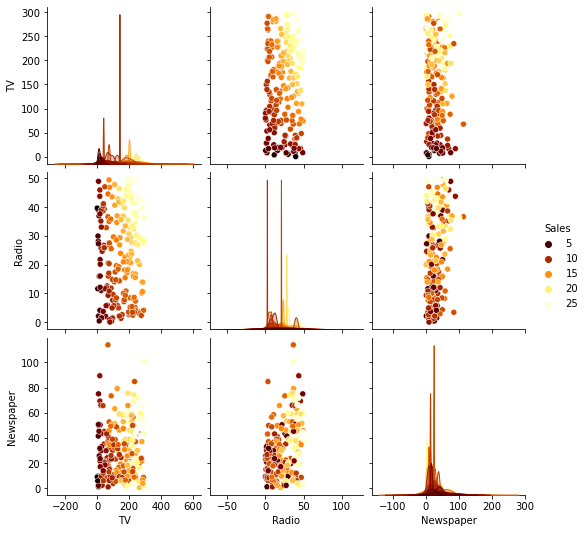

In [10]:
sns.pairplot(df, hue='Sales',palette='afmhot',size=2.5)

In [11]:
x = df[['TV','Radio','Newspaper']]

In [12]:
y = df[['Sales']]

In [13]:
df.shape

(200, 4)

In [14]:
x.shape

(200, 3)

In [15]:
y.shape

(200, 1)

In [16]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=13)

In [17]:
x_train.shape, x_test.shape,y_train.shape, y_test.shape 

((160, 3), (40, 3), (160, 1), (40, 1))

In [18]:
regmodel = lr.fit(x_train,y_train)

In [19]:
y_pretest = regmodel.predict(x_test)
y_pretest

array([[12.41367767],
       [ 5.32067348],
       [16.55144938],
       [12.36717245],
       [12.71077284],
       [23.63881378],
       [21.62206727],
       [14.74035857],
       [22.19982768],
       [15.32872133],
       [16.21757736],
       [ 6.10442096],
       [ 7.88988888],
       [18.91129331],
       [17.68863982],
       [16.7673735 ],
       [ 8.42129698],
       [ 9.69259232],
       [20.29047962],
       [17.71616686],
       [12.01762517],
       [ 7.84345791],
       [21.58818774],
       [12.12397718],
       [17.11548063],
       [19.33168908],
       [10.05575241],
       [14.1727504 ],
       [23.07525292],
       [ 8.76424307],
       [15.4412187 ],
       [18.25749861],
       [17.77840777],
       [ 7.04391172],
       [16.88038275],
       [ 8.86721612],
       [10.0519968 ],
       [20.67873857],
       [ 5.40059981],
       [10.49904798]])

In [20]:
y_pretest = regmodel.predict(x_test)
y_pretest

array([[12.41367767],
       [ 5.32067348],
       [16.55144938],
       [12.36717245],
       [12.71077284],
       [23.63881378],
       [21.62206727],
       [14.74035857],
       [22.19982768],
       [15.32872133],
       [16.21757736],
       [ 6.10442096],
       [ 7.88988888],
       [18.91129331],
       [17.68863982],
       [16.7673735 ],
       [ 8.42129698],
       [ 9.69259232],
       [20.29047962],
       [17.71616686],
       [12.01762517],
       [ 7.84345791],
       [21.58818774],
       [12.12397718],
       [17.11548063],
       [19.33168908],
       [10.05575241],
       [14.1727504 ],
       [23.07525292],
       [ 8.76424307],
       [15.4412187 ],
       [18.25749861],
       [17.77840777],
       [ 7.04391172],
       [16.88038275],
       [ 8.86721612],
       [10.0519968 ],
       [20.67873857],
       [ 5.40059981],
       [10.49904798]])

In [21]:
(mean_squared_error(y_test, y_pretest)) ** 0.5

1.4450331170699846

In [22]:
r2_score( y_pretest,y_test)

0.923230430701987

In [23]:
R.fit(x_train, y_train)
y_pred_ridge = R.predict(x_test)

In [24]:
(mean_squared_error(y_test, y_pred_ridge))**0.5

1.4450443882913804

In [25]:
r2_score(y_test, y_pred_ridge)

0.9308578548094248

In [26]:
L.fit(x_train, y_train)
y_pred_lasso = L.predict(x_test)

In [27]:
y_pred_lasso

array([12.45649332,  5.337478  , 16.57121349, 12.41055088, 12.75655791,
       23.61544425, 21.50564275, 14.89396963, 21.96976612, 15.3172846 ,
       16.23055875,  6.18818676,  7.90069203, 18.83857756, 17.73000939,
       16.68670668,  8.33656844,  9.76873812, 20.15041517, 17.69273802,
       12.06403668,  7.95455102, 21.58130585, 12.09869115, 17.18299647,
       19.39221625, 10.16931155, 14.43083081, 23.17868376,  8.68393138,
       15.43479953, 18.30721481, 17.7239206 ,  7.13906833, 16.76548207,
        8.9023674 , 10.10507222, 20.59436125,  5.48239668, 10.50587568])

In [28]:
(mean_squared_error(y_test, y_pred_lasso))**0.5

1.453709668511276

In [29]:
r2_score(y_test,  y_pred_lasso)

0.9300261399604096

In [30]:
E.fit(x_train,y_train)
y_pred_elastic = E.predict(x_test)

In [31]:
(mean_squared_error(y_test, y_pred_elastic))**0.5

1.4524538298766347

In [32]:
r2_score(y_test, y_pred_elastic)

0.9301469865385257

In [33]:
ETR.fit(x_train,y_train)
y_pred_etr = ETR.predict(x_test)

In [34]:
(mean_squared_error(y_test, y_pred_etr))**0.5

1.2404636230055275

In [35]:
r2_score(y_test, y_pred_etr)

0.9490494894601563

In [36]:
GBR.fit(x_train,y_train)
y_pred_gbr =GBR.predict(x_test)

In [37]:
(mean_squared_error(y_test, y_pred_gbr))**0.5

0.7817761194226571

In [38]:
r2_score(y_test, y_pred_gbr)

0.9797630399483608

In [39]:
model=est.fit(x_train,y_train)

In [40]:
y_pred_knb = model.predict(x_test)

In [41]:
(mean_squared_error(y_test, y_pred_knb))**0.5

1.698561155802169

In [42]:
r2_score(y_test, y_pred_knb)

0.9044693241503764

### Long Way- İnvest in tv

In [43]:
xtv,ytv= df[['TV']],df[['Sales']]

In [44]:
xtv_train, xtv_test,ytv_train, ytv_test = train_test_split(xtv,ytv,test_size=0.20,random_state=13)

In [45]:
regmodel = lr.fit(xtv_train,ytv_train)

In [46]:
ytv_pretest = regmodel.predict(xtv_test)
ytv_pretest

array([[14.90551819],
       [ 7.42035449],
       [17.81152292],
       [13.33432903],
       [16.3886466 ],
       [20.3745542 ],
       [20.83803183],
       [17.69565351],
       [17.44074082],
       [15.80003001],
       [14.79891833],
       [ 8.38902273],
       [10.4283243 ],
       [19.54029447],
       [20.21697181],
       [12.31931302],
       [ 7.61964987],
       [12.60666915],
       [18.27036577],
       [16.45816824],
       [15.03529192],
       [ 9.99265533],
       [20.8055884 ],
       [12.80132976],
       [17.21363678],
       [17.86714023],
       [14.17322354],
       [18.09887905],
       [20.96780557],
       [ 7.48060658],
       [12.36102601],
       [16.20789032],
       [13.62168516],
       [10.29391579],
       [13.30652037],
       [11.74923554],
       [13.45483321],
       [16.28668152],
       [ 9.0008132 ],
       [12.20807839]])

In [47]:
(mean_squared_error(ytv_test, ytv_pretest)) ** 0.5

3.294569183401592

In [48]:
r2_score(ytv_test, ytv_pretest)

0.6406002771701338

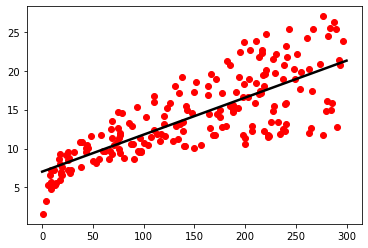

In [49]:
plt.scatter(xtv,ytv,color='red')
b,a=np.polyfit(xtv.values.reshape(200),ytv.values.reshape(200),deg=1)
xseq=np.linspace(0,300, num=100)
plt.plot(xseq,a + b * xseq,color='k',lw=2.5);

In [50]:
R.fit(xtv_train, ytv_train)
ytv_pred_ridge = R.predict(xtv_test)

L.fit(xtv_train, ytv_train)
ytv_pred_lasso = L.predict(xtv_test)

E.fit(xtv_train,ytv_train)
ytv_pred_elastic = E.predict(xtv_test)

ETR.fit(xtv_train,ytv_train)
ytv_pred_etr = ETR.predict(xtv_test)

GBR.fit(xtv_train,ytv_train)
ytv_pred_gbr =GBR.predict(xtv_test)

In [51]:
(mean_squared_error(ytv_test, ytv_pred_ridge))**0.5

3.29456970058422

In [52]:
r2_score(ytv_test, ytv_pred_ridge)

0.6406001643327355

In [53]:
(mean_squared_error(ytv_test, ytv_pred_lasso))**0.5

3.2963746635041313

In [54]:
r2_score(ytv_test,  ytv_pred_lasso)

0.6402062548786426

In [55]:
(mean_squared_error(ytv_test, ytv_pred_elastic))**0.5

3.296200729089119

In [56]:
r2_score(ytv_test, ytv_pred_elastic)

0.6402442231740756

In [57]:
(mean_squared_error(ytv_test, ytv_pred_etr))**0.5

4.927169572888678

In [58]:
r2_score(y_test, y_pred_etr)

0.9490494894601563

In [59]:
(mean_squared_error(y_test, y_pred_gbr))**0.5

0.7817761194226571

In [60]:
r2_score(ytv_test, ytv_pred_gbr)

0.4155215031217151

### Long Way- İnvest in radio

In [61]:
xrd,yrd= df[['Radio']],df[['Sales']]

In [62]:
xrd_train, xrd_test,yrd_train, yrd_test = train_test_split(xrd,yrd,test_size=0.20,random_state=13)

In [63]:
regmodel = lr.fit(xrd_train,yrd_train)

In [64]:
ETR.fit(xrd_train,yrd_train)
yrd_pred_etr = ETR.predict(xrd_test)

In [65]:
yrd_pretest = regmodel.predict(xrd_test)
yrd_pretest

array([[11.35621866],
       [11.6556423 ],
       [12.64748309],
       [12.92819275],
       [10.13981014],
       [17.34469138],
       [14.66859264],
       [11.01936707],
       [18.65466979],
       [13.41475616],
       [15.39843775],
       [11.54335844],
       [11.22522082],
       [13.22761639],
       [11.37493264],
       [18.43010206],
       [14.57502275],
       [10.92579719],
       [15.90371513],
       [15.21129798],
       [10.81351332],
       [11.73049821],
       [14.7808765 ],
       [13.15276048],
       [13.90131957],
       [15.52943559],
       [ 9.72810264],
       [10.12109617],
       [16.27799468],
       [15.08030014],
       [17.0826957 ],
       [16.10956888],
       [18.16810638],
       [10.57023162],
       [17.4944032 ],
       [10.90708321],
       [10.40180583],
       [18.41138808],
       [10.1772381 ],
       [12.10477775]])

In [66]:
(mean_squared_error(yrd_test, yrd_pred_etr))**0.5

5.35162812713207

In [67]:
r2_score(y_test, y_pred_etr)

0.9490494894601563

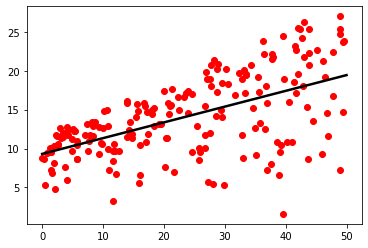

In [68]:
plt.scatter(xrd,yrd,color='red')
b,a=np.polyfit(xrd.values.reshape(200),yrd.values.reshape(200),deg=1)
xseq=np.linspace(0,50, num=100)
plt.plot(xseq,a + b * xseq,color='k',lw=2.5);

### Long Way- İnvest in Newspaper

In [69]:
xnw,ynw= df[['Newspaper']],df[['Sales']]

In [70]:
xnw_train, xnw_test,ynw_train, ynw_test = train_test_split(xnw,ynw,test_size=0.20,random_state=13)

In [71]:
regmodel = lr.fit(xnw_train,ynw_train)

In [72]:
ETR.fit(xnw_train,ynw_train)
ynw_pred_etr = ETR.predict(xnw_test)

In [73]:
ynw_pretest = regmodel.predict(xnw_test)
ynw_pretest

array([[13.43232911],
       [12.99497973],
       [13.74839672],
       [14.05711393],
       [13.00233014],
       [15.21847866],
       [12.85164674],
       [14.86198379],
       [12.90309961],
       [13.59403812],
       [14.72967642],
       [13.87702889],
       [12.8185699 ],
       [12.79651867],
       [13.57198689],
       [14.67454834],
       [12.86267236],
       [13.63446537],
       [12.98027891],
       [14.20779733],
       [13.25591928],
       [14.36950634],
       [14.37318155],
       [13.21181682],
       [14.90241104],
       [15.51249505],
       [13.67856783],
       [15.90206676],
       [16.49377474],
       [13.13096231],
       [15.10822251],
       [15.56394791],
       [14.95386391],
       [13.67489263],
       [13.84762726],
       [13.05010781],
       [13.12728711],
       [14.72967642],
       [13.29267132],
       [13.18609038]])

In [74]:
(mean_squared_error(ynw_test, ynw_pred_etr))**0.5

6.821936125470539

In [75]:
r2_score(y_test, y_pred_etr)

0.9490494894601563

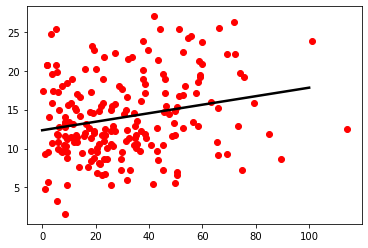

In [76]:
plt.scatter(xnw,ynw,color='red')
b,a=np.polyfit(xnw.values.reshape(200),ynw.values.reshape(200),deg=1)
xseq=np.linspace(0,100, num=100)
plt.plot(xseq,a + b * xseq,color='k',lw=2.5);

#### As can be seen from the graphs, our answer is TV

### Part of the sort way

### If you want to continue, you can use

In [77]:
def regresions(dataset,y):
    LR=LinearRegression()
    Las=Lasso()
    R=Ridge()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KNR=KNeighborsRegressor()
    x=dataset.drop([y],axis=1)
    y=dataset[y]
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=13)

    regs=[LR,Las,R,ETR,KNR,GBR]
    regs_name=["Linear","Lasso","Ridge","ExtraTree",'KNeighbour','Gradient']

    r2=[]
    mean_s=[]
    mean_a=[]
    for reg in regs:
        model=reg.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        mean_s.append(mean_squared_error(y_test,y_pred)**0.5)
        r2.append(r2_score(y_test,y_pred))
        mean_a.append(mean_absolute_error(y_test,y_pred))
        
    df={"mean_absolute_error":mean_a,"mean_squared_error":mean_s,"r2_score":r2}
    a2={'RealData':y_test,'EstimatedData':y_pred}
    df2=pd.DataFrame(a2)
    df=pd.DataFrame(df,index=regs_name)
    return df,df2,model

In [78]:
a1,a2,model=regresions(df,'Sales')

In [79]:
a2.head()

,RealData,EstimatedData
179,12.6,13.263639
155,3.2,4.676249
23,15.5,15.523431
159,12.9,12.893008
96,11.7,11.415367


In [80]:
a1.sort_values('r2_score')

,mean_absolute_error,mean_squared_error,r2_score
KNeighbour,1.192500,1.698561,0.904469
Lasso,1.182754,1.453710,0.930026
Ridge,1.180097,1.445044,0.930858
Linear,1.180093,1.445033,0.930859
ExtraTree,1.087500,1.440573,0.931285
Gradient,0.611606,0.782076,0.979748


<AxesSubplot:xlabel='RealData', ylabel='EstimatedData'>

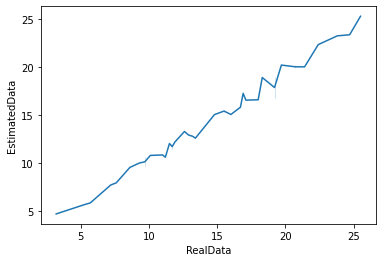

In [81]:
sns.lineplot(a2.RealData,a2.EstimatedData)